In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('ggplot')
from matplotlib import rcParams
rcParams['lines.linewidth'] = 0.7
rcParams['figure.figsize'] = 9, 6
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numba

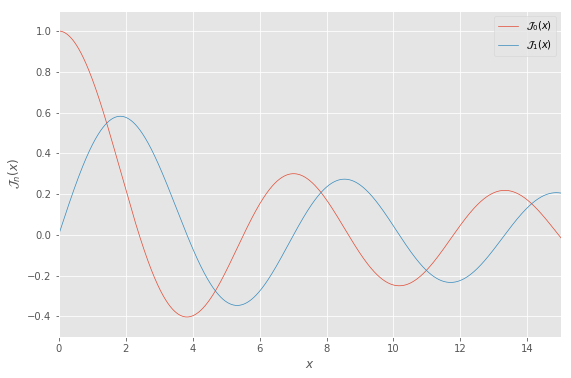

In [2]:
import numpy as np
import pylab as py
import scipy.special as sp

x = np.linspace(0, 15, 500000)

for v in range(0, 2):
    py.plot(x, sp.jv(v, x));

py.xlim((0, 15));
py.ylim((-0.5, 1.1));
py.legend(('$\mathcal{J}_0(x)$', '$\mathcal{J}_1(x)$', '$\mathcal{J}_2(x)$',
           '$\mathcal{J}_3(x)$', '$\mathcal{J}_4(x)$', '$\mathcal{J}_5(x)$'),
           loc = 0);
py.xlabel('$x$')
py.ylabel('$\mathcal{J}_n(x)$')
#py.title('Plots of the first six Bessel Functions')                                
py.grid(True)
#py.savefig('besseln0to6.eps', format = 'eps')                                      
py.show();


In [3]:
f = np.linspace(0.1,18500, 5000) #frequency Hz
omega = 2*np.pi*f # angular frequncy
a = 0.0012# pore size parameter
a2 = a*a
nu = 0.001 # fluid viscosity
alpha = 1.671 # tortuosity factor
K = 0.012 #hydraulic conductivity
Gsk = 0.1e9

rho_f = 1.# fluid density
rho_g = 2.644 # grain density
n = 0.35 # porosity
rho_mix= (1-n)*rho_g + n*rho_f

dseta = np.sqrt(omega*a2*rho_f/nu)

ar = dseta*np.exp(-1j*np.pi/4)
T = np.exp(3j*np.pi/4)*sp.jv(1,ar)/sp.jv(0,ar)

In [4]:
F = dseta*T/4/(1+2j*T/dseta)

In [5]:
A22 = alpha*rho_f/n - 1j*nu*F/omega/K
Vs = (rho_mix-rho_f*rho_f/A22)/Gsk

<IPython.core.display.Javascript object>


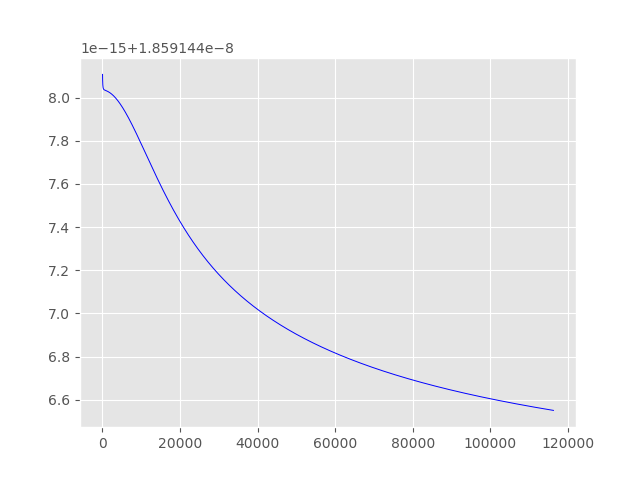

In [6]:
%matplotlib notebook
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)#, aspect = 'equal')
ax3.plot(omega[4:-1], Vs.real[4:-1], 'b');
plt.show();

In [7]:
Vs.size
omega.size
omega[-1]

5000

5000

116238.92818282235